In [6]:

!pip install catboost

     |████████████████████████████████| 66.1MB 59kB/s 


In [8]:
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split

In [10]:

train = pd.read_csv('/content/drive/My Drive/UCT HACK new Data/UCT_train_new (4).csv')
test = pd.read_csv('/content/drive/My Drive/UCT HACK new Data/UCT_test_new (5).csv')
test1= pd.read_csv('/content/drive/My Drive/UCT HACK new Data/UCT_test_new (4).csv')



In [11]:
train.drop('Customer.Id', axis=1, inplace = True)
test.drop('Customer.Id', axis=1, inplace = True)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
test.head()

,Insured_Period,Residential,Building_PaintedN,Building_PaintedV,Building_FencedN,Building_FencedV,SettlementR,SettlementU,Building.Dimension,Building_Type1,Building_Type2,Building_Type3,Building_Type4,NumberOfWindows .,NumberOfWindows>=10,NumberOfWindows1,NumberOfWindows2,NumberOfWindows3,NumberOfWindows4,NumberOfWindows5,NumberOfWindows6,NumberOfWindows7,NumberOfWindows8,NumberOfWindows9
0,1.000000,0,0,1,1,0,1,0,500.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1.000000,0,1,0,0,1,0,1,1700.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,1.000000,0,0,1,0,1,0,1,2187.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0.084932,1,0,1,0,1,0,1,220.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1.000000,0,1,0,0,1,0,1,150.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.isnull().sum()

Insured_Period         0
Residential            0
Building_PaintedN      0
Building_PaintedV      0
Building_FencedN       0
Building_FencedV       0
SettlementR            0
SettlementU            0
Building.Dimension     0
Building_Type1         0
Building_Type2         0
Building_Type3         0
Building_Type4         0
NumberOfWindows   .    0
NumberOfWindows>=10    0
NumberOfWindows1       0
NumberOfWindows2       0
NumberOfWindows3       0
NumberOfWindows4       0
NumberOfWindows5       0
NumberOfWindows6       0
NumberOfWindows7       0
NumberOfWindows8       0
NumberOfWindows9       0
Claim                  0
dtype: int64

In [14]:
X = train.drop('Claim', axis=1)
y = train.Claim

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score

from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit, GroupKFold

In [19]:
fold=StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=CatBoostClassifier(n_estimators=700,
                         eval_metric='AUC',
                         max_depth=5,learning_rate=0.12,
                         subsample=0.7,
                         bootstrap_type='MVS', 
                         boosting_type = 'Ordered', 
                         l2_leaf_reg =40, 
                         use_best_model=True)

In [ ]:
model=CatBoostClassifier(n_estimators=500,eval_metric='AUC',max_depth=5,learning_rate=0.112,od_wait=50, 
                              subsample=0.6,bootstrap_type='MVS',metric_period=100, boosting_type = 'Ordered',score_function = 'Cosine', 
                     use_best_model=True)

In [20]:

m.fit(X_train, y_train, eval_set=(X_test, y_test))


0:	test: 0.6535087	best: 0.6535087 (0)	total: 56ms	remaining: 39.1s
1:	test: 0.6710937	best: 0.6710937 (1)	total: 63.3ms	remaining: 22.1s
2:	test: 0.6909521	best: 0.6909521 (2)	total: 70.5ms	remaining: 16.4s
3:	test: 0.7001650	best: 0.7001650 (3)	total: 77.5ms	remaining: 13.5s
4:	test: 0.6983266	best: 0.7001650 (3)	total: 84.4ms	remaining: 11.7s
5:	test: 0.6986862	best: 0.7001650 (3)	total: 91.2ms	remaining: 10.5s
6:	test: 0.6973095	best: 0.7001650 (3)	total: 98.1ms	remaining: 9.71s
7:	test: 0.6994943	best: 0.7001650 (3)	total: 105ms	remaining: 9.06s
8:	test: 0.7000058	best: 0.7001650 (3)	total: 111ms	remaining: 8.56s
9:	test: 0.7045187	best: 0.7045187 (9)	total: 117ms	remaining: 8.09s
10:	test: 0.7069793	best: 0.7069793 (10)	total: 124ms	remaining: 7.78s
11:	test: 0.7108859	best: 0.7108859 (11)	total: 131ms	remaining: 7.52s
12:	test: 0.7129139	best: 0.7129139 (12)	total: 138ms	remaining: 7.29s
13:	test: 0.7135992	best: 0.7135992 (13)	total: 145ms	remaining: 7.1s
14:	test: 0.7158702	be

In [21]:
pred = m.predict_proba(test)[:, 1]

In [22]:
test_id = test1['Customer.Id']
test_id = np.transpose(test_id)

In [23]:
pred = {'Claim':pred}
pred = pd.DataFrame(data=pred)

In [24]:
test_id = {'Customer ID':test_id}
test_id = pd.DataFrame(data=test_id)

In [ ]:
#pred

In [ ]:
#test_id

In [25]:
out = pd.concat([test_id,pred],axis=1)

In [ ]:
#out

In [26]:
out.to_csv('submission45.csv',header=True,index=False)


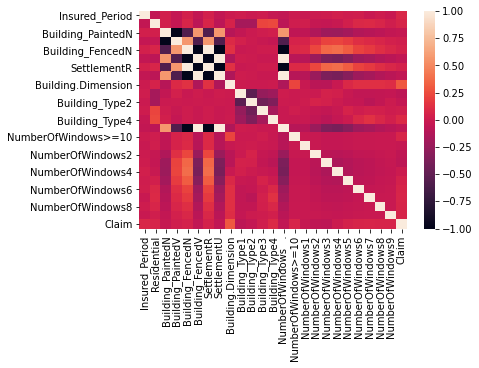

In [ ]:
sns.heatmap(train.corr())